# 🍷 Red Wine Quality Analysis

Con el siguiente conjuntos de datos aplicaremos Algoritmos de clasificación o regresión. Las clases están ordenadas y no equilibradas (por ejemplo, hay vinos buenos o malos).

# Importing Libraries 

In [ ]:

# For Data Manipulation
import pandas as pd
import numpy as np
import sklearn as s
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math
from itertools import cycle

# For Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier as KNN

# For Classification Results
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.exceptions import NotFittedError
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

#Bibliotecas para generar gráficos
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
%matplotlib inline
import warnings
warnings.simplefilter(action="ignore")


from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier

# Loading the dataset

In [ ]:
wine = pd.read_csv('./winequality-red.csv')

<a id = '3.1'></a>
<p style = "font-size : 35px; color :#000080 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #808080; border-radius: 5px 5px;"><strong>Variable Description</strong></p>


<ol>
    <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>fixed acidity : </strong> most acids involved with wine or fixed or nonvolatile (do not evaporate readily) </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>volatile acidity : </strong>the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste</p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>citric acid : </strong> found in small quantities, citric acid can add 'freshness' and flavor to wines</p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>residual sugar : </strong>the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>chlorides : </strong> the amount of salt in the wine</p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>free sulfur dioxide : </strong> the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>total sulfur dioxide : </strong> amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine</p> </li>
    <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>density : </strong>the density of water is close to that of water depending on the percent alcohol and sugar content </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>ph : </strong>  describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>sulphates : </strong> a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>alcohol sulfur dioxide : </strong> the percent alcohol content of the wine </p> </li>
            <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>quality : </strong> output variable (based on sensory data, score between 0 and 10)</p> </li>

![giphy.gif](https://media.giphy.com/media/ng6NcNAvohN6M/giphy.gif)

# Exploratory Data Analysis (EDA)

In [ ]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# Definir etiquetas de Bueno o malo





In [ ]:
def convert_quali (quality):
    if quality <= 5:
        return 0
    else:
        return 1

Bueno = 1
Malo = 0

In [ ]:
wine["quality_bin"] = wine["quality"].apply(convert_quali)

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_bin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [ ]:
features = wine.columns[:-2]
output = wine.columns[-1]
print("Features: \n{}, \n\nLabels: \n{}".format(features.values,output))

Features: 
['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol'], 

Labels: 
quality_bin


## Data Splitting

In [ ]:
X = wine[features].values
y = wine[output].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)
print('Training size: {}, Testing size: {}'.format(X_train.size,X_test.size))

Training size: 12309, Testing size: 5280


In [ ]:
X = wine.drop(["quality" ,"quality_bin"] , axis=1)
y = wine['quality_bin']


In [ ]:
wine['quality_bin'].value_counts()

1    855
0    744
Name: quality_bin, dtype: int64

# Functions for Analysing Results

## Probability Output

In [ ]:
def get_probabilty_output(X_test, model_fitted, value_count=10):
    def highlight_max(data, color='yellow'):
        attr = 'background-color: {}'.format(color)
        if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
            is_max = data == data.max()
            return [attr if v else '' for v in is_max]
        else:  # from .apply(axis=None)
            is_max = data == data.max().max()
            return pd.DataFrame(np.where(is_max, attr, ''), index=data.index, columns=data.columns)
        
    y_scores = model_fitted.predict_proba(X_test)
    prob_df = pd.DataFrame(y_scores*100).head(value_count)
    styled_df = prob_df.style.background_gradient(cmap='Reds')
    styled_df = styled_df.highlight_max(axis=1, color='green')
    return styled_df

## Classification Report

In [ ]:
def get_classification_report(y_test,predictions,average="macro"):
    #Confusion Matrix}
   
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True)
    plt.title("Confusion Matrix")
    
    acc = accuracy_score(y_test, predictions)
    pre = precision_score(y_test, predictions, average=average)
    rec = recall_score(y_test, predictions, average=average)
    # Prediction Report
    print(classification_report(y_test, predictions, digits=3))
    print("Overall Accuracy:", acc)
    print("Overall Precision:", pre)
    print("Overall Recall:", rec)
    
    return acc,pre,rec
    

## Classification ROC

In [ ]:
def get_classification_ROC(X,y,model,test_size,model_fitted=False,random_state=0):
    
    def check_fitted(clf): 
        return hasattr(clf, "classes_")
    
    if(len(np.unique(y)) == 2):
        #Binary Classifier
        if not check_fitted(model):
            model = model.fit(X,y)
        
        plot_roc_curve(model, X, y)
        y_score = model.predict_proba(X)[:, 1]
        fpr, tpr, threshold = roc_curve(y, y_score)
        auc = roc_auc_score(y, y_score)
        return auc
#         print("False Positive Rate: {} \nTrue Positive Rate: {} \nThreshold:{}".format(fpr,tpr,threshold))
    
    else:
        #Multiclass Classifier
        y_bin = label_binarize(y, classes=np.unique(y))
        n_classes = y_bin.shape[1]

        # shuffle and split training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=test_size, random_state=random_state)

        # Learn to predict each class against the other
        classifier = OneVsRestClassifier(model)
        model_fitted = classifier.fit(X_train, y_train)
        try:
            y_score = model_fitted.decision_function(X_test)
        except:
            y_score = model_fitted.predict_proba(X_test)



        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])


        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


        plt.figure()
        lw = 2
        plt.plot(fpr[2], tpr[2], color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic averaged')
        plt.legend(loc="lower right")
        plt.show()



        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure(figsize=(10,10))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]),
                 color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]),
                 color='navy', linestyle=':', linewidth=4)

        colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'blue', 'purple', 'green'])
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                     label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('multi-class ROC (One vs All)')
        plt.legend(loc="lower right")
        plt.show()

# **KNN: k-Nearest Neighbor Classifier**

In [ ]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 120)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNN(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.7020833333333333, 0.65, 0.6520833333333333, 0.6291666666666667, 0.6520833333333333, 0.6541666666666667, 0.6229166666666667, 0.6395833333333333, 0.6354166666666666, 0.6375, 0.65625, 0.6520833333333333, 0.65, 0.6541666666666667, 0.6604166666666667, 0.65625, 0.65625, 0.6541666666666667, 0.65, 0.6520833333333333, 0.6625, 0.6625, 0.66875, 0.6645833333333333, 0.6708333333333333, 0.6708333333333333, 0.6604166666666667, 0.6583333333333333, 0.6604166666666667, 0.6541666666666667, 0.65625, 0.6395833333333333, 0.6458333333333334, 0.6416666666666667, 0.65625, 0.65, 0.6541666666666667, 0.6541666666666667, 0.63125, 0.6375, 0.6375, 0.6520833333333333, 0.64375, 0.6458333333333334, 0.6395833333333333, 0.65, 0.65625, 0.6458333333333334, 0.6583333333333333, 0.6479166666666667, 0.65, 0.6520833333333333, 0.64375, 0.6416666666666667, 0.64375, 0.6479166666666667, 0.6479166666666667, 0.6416666666666667, 0.6375, 0.6458333333333334, 0.6416666666666667, 0.6541666666666667, 0.6479166666666667, 0.65833333333333

Text(0, 0.5, 'Testing Accuracy')

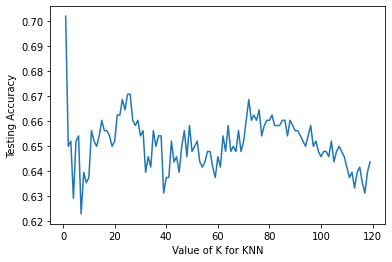

In [ ]:
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
knn = KNN(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy: %.2f' % metrics.accuracy_score(y_test, y_pred))
print('Loss: %.2f' % metrics.brier_score_loss(y_test, y_pred))

Accuracy: 0.70
Loss: 0.30


              precision    recall  f1-score   support

           0       0.68      0.67      0.68       224
           1       0.72      0.73      0.72       256

    accuracy                           0.70       480
   macro avg       0.70      0.70      0.70       480
weighted avg       0.70      0.70      0.70       480

Accuracy: 0.70


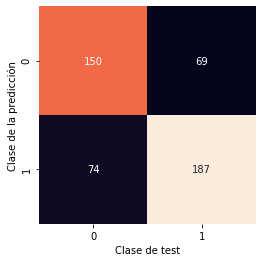

In [ ]:
matrixKNN = confusion_matrix(y_test, y_pred) 
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
# Accuracy score
print('Accuracy: %.2f' % accuracy_score(y_pred,y_test))

sns.heatmap(matrixKNN.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase de test')
plt.ylabel('Clase de la predicción');

BUSCANDO LA MEJOR METRICA

In [ ]:
parameters_KNN = {
    "n_neighbors" : range(1, 120),
    "weights" : ('uniform','distance'),
    'metric':('euclidean','manhattan','chebyshev','minkowski','seuclidean','mahalanobis'),
    "algorithm" : ('auto','ball_tree','kd_tree','brute'),
    'p': [1,2,5]    
}

model_KNN = KNN()
model_KNN_with_best_params = GridSearchCV(model_KNN, parameters_KNN, scoring="accuracy")
model_KNN_with_best_params.fit(X_train,y_train)
model_KNN_best_params = model_KNN_with_best_params.best_params_

In [ ]:
model_KNN_best_params

{'algorithm': 'brute',
 'metric': 'seuclidean',
 'n_neighbors': 101,
 'p': 1,
 'weights': 'distance'}

naranja son cuantos ceros accerte cuantos clasifico

pastel es cuantos 1 acerto

negro y violeta son los falsos 

### Predicting 

In [ ]:
predictions_KNN = model_KNN_with_best_params.predict(X_test)
print("Predictions:",predictions_KNN[:10])
print("Actual:",y_test[:10])

Predictions: [1 1 0 0 0 0 0 0 1 0]
Actual: [1 1 0 0 0 1 0 0 0 0]


In [ ]:
print('Accuracy: %.2f' % metrics.accuracy_score(y_test, predictions_KNN))
print('Loss: %.2f' % metrics.brier_score_loss(y_test, predictions_KNN))

Accuracy: 0.82
Loss: 0.18


### Result

In [ ]:
get_probabilty_output(X_test=X_test, model_fitted=model_KNN_with_best_params)

,0,1
0,0.000000,100.000000
1,41.771158,58.228842
2,62.771710,37.228290
3,66.400731,33.599269
4,100.000000,0.000000
5,65.345771,34.654229
6,58.431685,41.568315
7,75.915798,24.084202
8,47.511309,52.488691
9,50.516790,49.483210


              precision    recall  f1-score   support

           0       0.81      0.79      0.80       224
           1       0.82      0.84      0.83       256

    accuracy                           0.82       480
   macro avg       0.82      0.82      0.82       480
weighted avg       0.82      0.82      0.82       480

Accuracy: 0.82


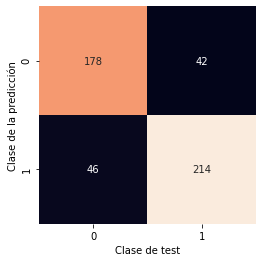

In [ ]:
matrixKNN = confusion_matrix(y_test, predictions_KNN) 
# Summary of the predictions made by the classifier
print(classification_report(y_test, predictions_KNN))
# Accuracy score
print('Accuracy: %.2f' % accuracy_score(predictions_KNN,y_test))

sns.heatmap(matrixKNN.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase de test')
plt.ylabel('Clase de la predicción');

              precision    recall  f1-score   support

           0      0.809     0.795     0.802       224
           1      0.823     0.836     0.829       256

    accuracy                          0.817       480
   macro avg      0.816     0.815     0.816       480
weighted avg      0.817     0.817     0.817       480

Overall Accuracy: 0.8166666666666667
Overall Precision: 0.8160839160839161
Overall Recall: 0.8152901785714286


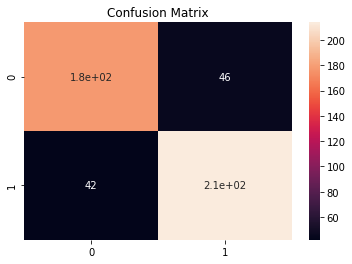

In [ ]:
acc_KNN,pre_KNN,rec_KNN = get_classification_report(y_test,predictions_KNN)

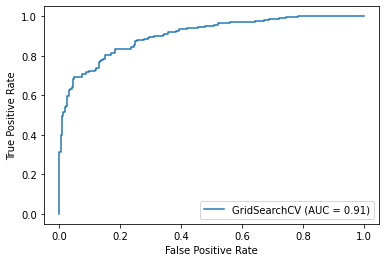

In [ ]:
auc_KNN = get_classification_ROC(X_test,y_test,model_KNN_with_best_params,test_size=0.3,random_state=0)

RESUMEN

con k = 48
- Accuracy: 0.79
- Loss: 0.21

con k = 1
- Accuracy: 0.71
- Loss: 0.29 

